# Multi-factor model example:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import ihsmarkit
ihsmarkit.authentication('username','password');

## Import factors

In [16]:
factors = ['impvol', 'altmanz','fc_egp','bp']
df=ihsmarkit.signals(factors,'US Total Cap','01/01/2014','05/06/2018','true','zscore')

## Plot factor coverage

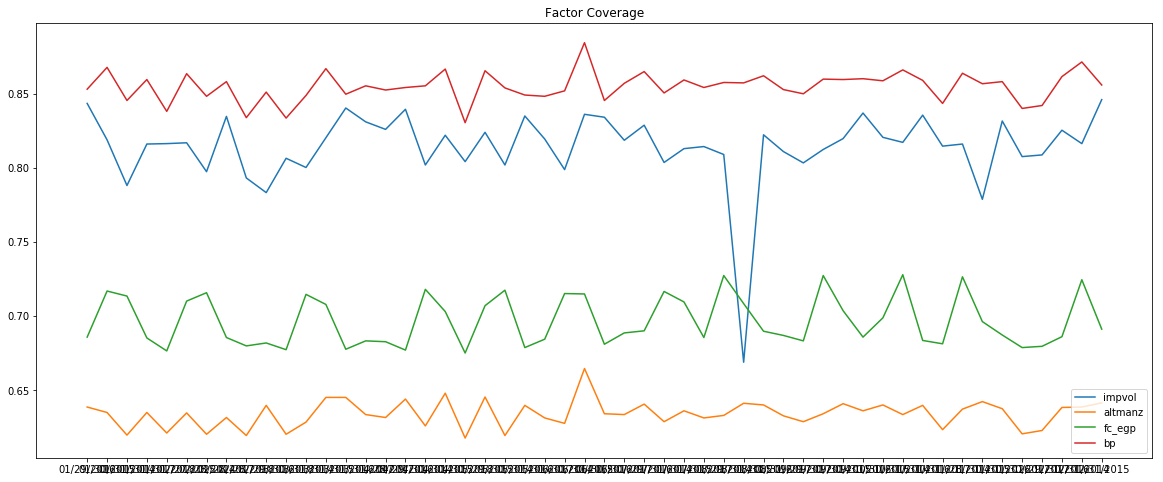

In [19]:
total=df['cusip'].groupby('date').count()
plt.plot(df.groupby('date')[factors].count().div(total.iloc[0]));
plt.legend(factors,loc=4)
plt.title("Factor Coverage")
plt.rcParams["figure.figsize"] = "30, 8"
plt.show()     
df.groupby('date')[factors].count().div(total.iloc[0])

## Fill missing data

In [23]:
df=df.fillna(0)
df.head(10)

## Factor correlations

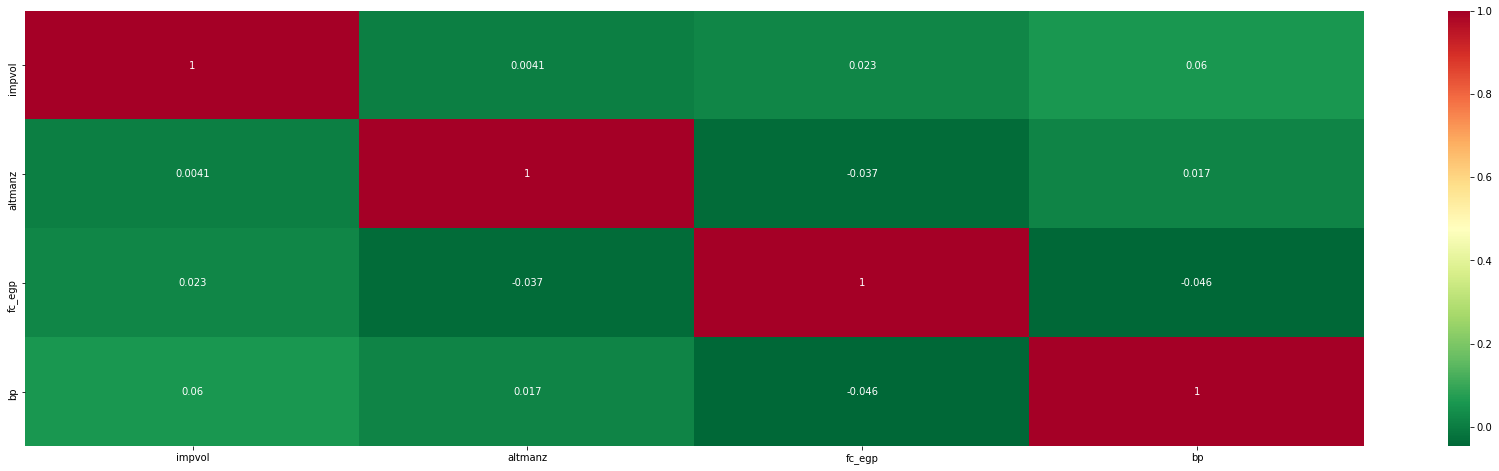

In [20]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True,cmap="RdYlGn_r");

## Create a new column for average rank

In [24]:
df['mean']=df.mean(axis=1)

In [25]:
df.sort_values('mean',ascending=False).head(10)

## Calculate percentile rank

In [26]:
df['mean_rank']=df.groupby('date')['mean'].rank(pct=True)

In [28]:
df.sort_values('mean_rank',ascending=False)